## Лабораторная работа 6.

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Лисовский Кирилл Алексеевич
#### Никитенко Андрей Михайлович
#### Уксусников Николай Алексеевич
#### Савин Михаил Валерьевич
#### Степаненко Дмитрий Владимирович

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import pywt
%matplotlib inline

import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
%matplotlib inline
from scipy.optimize import curve_fit

## 2. Создадим зашумленный временной ряд с 2 периодиками:

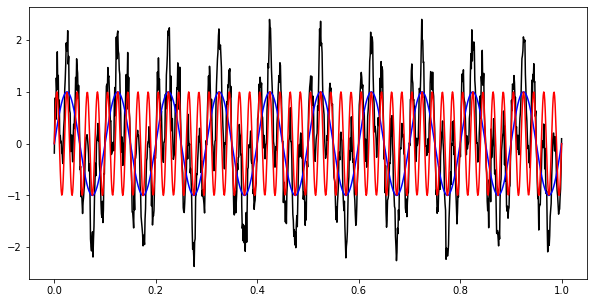

In [2]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

## 3. Для начала используем вейвлет Мейера:

In [3]:
wvlt = pywt.Wavelet('dmey')

## 4. декомпозиция с помощью дискретных вейвлетов происходит до определенного уровня (level), ограниченного размером доступных данных. В нашем случае возможно разложение до 4 уровня:

In [4]:
pywt.dwt_max_level(len(F), wvlt) # будет выведено число 4

4

## 5. По краям временного интервала вейвлет может по-разному трактовать конструируемые точки для экстраполяции (mode): простое дополнение нулями, константами, симметрично/асимметрично, периодически и т.д.

## 6. Декомпозиция всегда происходит в виде комбинации коэффициентов Аппроксимации (cA) плюс Детали (cD). Всегда есть одна аппроксимация, а число деталей равно уровню декомпозиции. Меняя выбор группировки коэффициентов аппроксимации и деталей, будут меняться восстановленные компоненты и соответствующая декомпозиция ряда.

## 7. Разобьем наш исходный ряд на компоненты с помощью вейвлета Мейера, в режиме периодизации, до 4 уровня декомпозиции:

In [5]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4)

## 8. Обратите внимание, как выглядят выходные результаты: одна аппроксимация cA4 с номером уровня и 4 детали с убывающими номерами от 4 уровня cD4 до 1 уровня cD1. Если бы мы декомпозировали ряд на 3 уровня (level=3), то тогда выходные значения следовало бы записать как: cA3, cD3, cD2, cD1. Можно на выходе функции использовать и одну переменную, но ее все равно придется разбивать на отдельные элементы. Также следует помнить, что в результате декомпозиции получаются не новые временные ряды, а только вейвлет-коэффициенты декомпозиции.

## 9. Восстановим две периодики исходного модельного ряда:

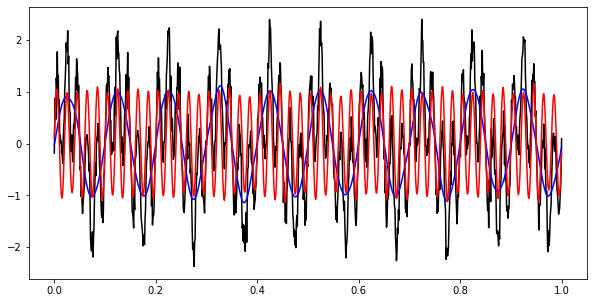

In [6]:
Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # это будет первая периодика
plt.plot(t, Fre2, 'r') # это будет вторая периодика
plt.show()

## 10. Снова обратите внимание на форму записи восстанавливаемых компонент. Те коэффициенты, которые мы не хотим использовать для реконструкции компонент (лишние детали и т.д.), мы заменяем на None. Меняя комбинации используемых и неиспользуемых аппроксимаций и деталей, мы будем получать разные восстановленные компоненты.

## 11. Проведите аналогичную декомпозицию для 3 уровня (level = 3). Вейвлет не меняйте. Сравните полученные результаты.

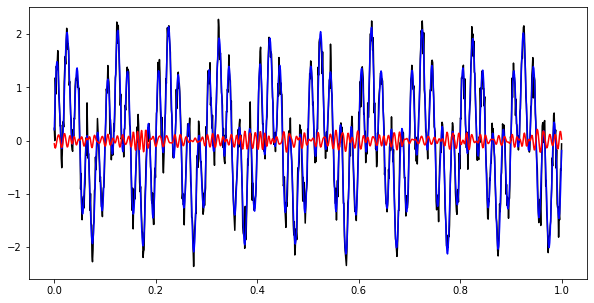

In [7]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))

wvlt = pywt.Wavelet('dmey')

cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

Fre = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # это будет первая периодика
plt.plot(t, Fre2, 'r') # это будет вторая периодика
plt.show()

## 12. Повторите все проделанные шаги по декомпозиции ряда и восстановлению его компонент для варианта № 3 базисного вейвлета:

In [8]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))

wvlt = pywt.Wavelet('haar') # Используем вейвлет (haar)

print('Декомпозиция вейвлета до уровня: ', end = ' ')
pywt.dwt_max_level(len(F), wvlt)

# декомпозиция с помощью дискретных вейвлетов происходит до определенного уровня, ограниченного размером доступных данных.

Декомпозиция вейвлета до уровня:  

10

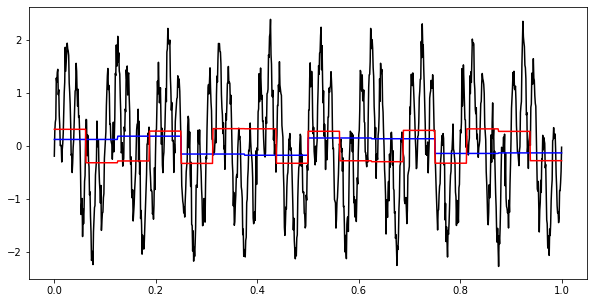

In [9]:
cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=7)

Fre = pywt.waverec((cA7, None, None, None, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD7, None, None, None, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # первая периодика
plt.plot(t, Fre2, 'r') # вторая периодика
plt.show()

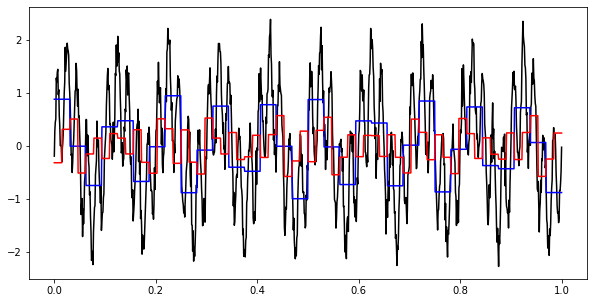

In [10]:
cA5, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=5)

Fre = pywt.waverec((cA5, None, None, None, None, None,), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD5, None, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # первая периодика
plt.plot(t, Fre2, 'r') # вторая периодика
plt.show()

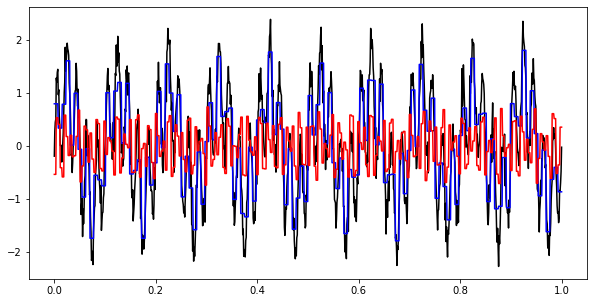

In [11]:
cA3,cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

Fre = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # первая периодика
plt.plot(t, Fre2, 'r') # вторая периодика
plt.show()

## 13. Стационарное Вейвлет Преобразование (Stationary Wavelet Transform = SWT). Этот метод дает гораздо большие возможности декомпозиции по уровню и по комбинации аппроксимаций и деталей:

In [12]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt, level=5)

## 14. Восстановим искомые периодические компоненты следующей комбинацией пар, при этом нам еще потребуется нормировка, так как часть коэффициентов мы полностью выбросили:

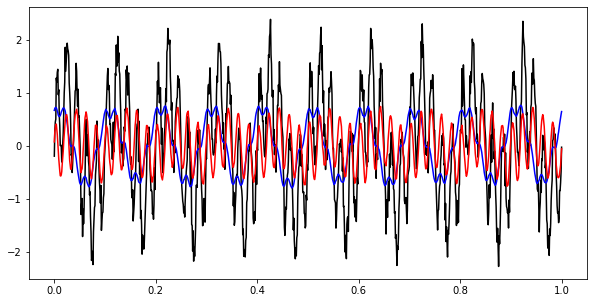

In [13]:
rr1 = pywt.iswt([(cA5, cD5)], wvlt)
rr2 = pywt.iswt([(cD4, cD3)], wvlt)
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, rr1/5, 'b') # перенормируем
plt.plot(t, rr2/4, 'r') # перенормируем
plt.show()

## 15. Проделайте декомпозицию SWT для варианта # 3 вейвлета. Уровень декомпозиции может отличаться.

In [14]:
wvlt = pywt.Wavelet('haar')

print('Декомпозиция вейвлета до уровня: ', end = ' ')
pywt.dwt_max_level(len(F), wvlt)

# декомпозиция с помощью дискретных вейвлетов происходит до определенного уровня, ограниченного размером доступных данных.

Декомпозиция вейвлета до уровня:  

10

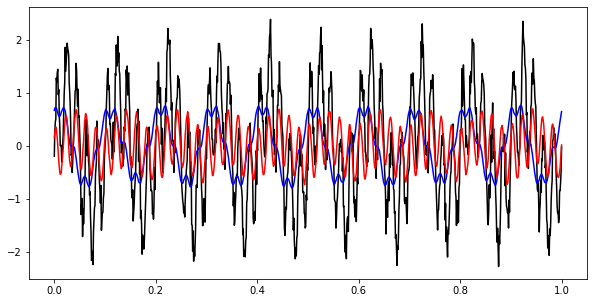

In [15]:
(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt, level=5)

rr1 = pywt.iswt([(cA5, cD5)], wvlt)
rr2 = pywt.iswt([(cD4, cD4)], wvlt)
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, rr1/5, 'b') # перенормируем
plt.plot(t, rr2/4, 'r') # перенормируем
plt.show()

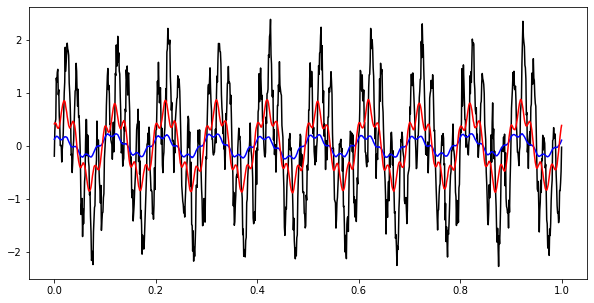

In [16]:
(cA7, cD7), (cA6, cD6), (cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt, level=7)

rr1 = pywt.iswt([(cA7, cD7)], wvlt)
rr2 = pywt.iswt([(cD6, cD6)], wvlt)
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, rr1/7, 'b') # перенормируем
plt.plot(t, rr2/6, 'r') # перенормируем
plt.show()

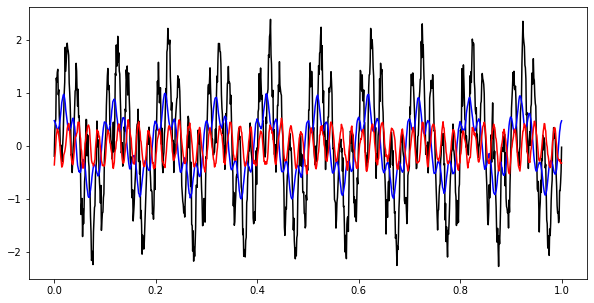

In [17]:
rr1 = pywt.iswt([(cA4, cD4)], wvlt)
rr2 = pywt.iswt([(cD3, cD3)], wvlt)
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, rr1/4, 'b') # перенормируем
plt.plot(t, rr2/3, 'r') # перенормируем
plt.show()

## 16. Cамый мощный инструмент вейвлет-декомпозиции, называемый Пакетной Вейвлет Декомпозицией (Wavelet Packet Decomposition = WPD). Этот метод опирается на дискретное преобразование, но позволяет произвести полный перебор комбинаций коэффициентов аппроксимации a и деталей d.

## 17. При таком большом числе возможных вариантов, декомпозиция представляется в виде бинарного дерева, выборка или удаление узлов из которого и будет менять после реконструкции полученные временные ряды. Но для начала создадим общую пакетную декомпозицию:

In [18]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')])

# выводим все комбинации узлов, упорядоченные по их частотной ширине спектра

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


## 18. Попробуем удалить один из узлов:

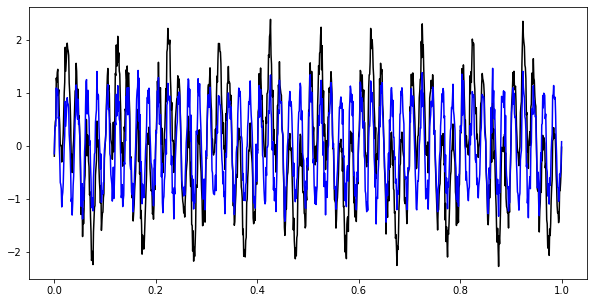

In [19]:
del wp['aaaa'] # удалим самый «глубокий» узел
reF = wp.reconstruct() # и восстановим ряд …
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF, 'b') # получим нечто периодическое, плохого качества
plt.show()

## 19. Если удаление узлов не приводит к желаемым результатам, возможно есть смысл делать отдельную выборку ветвей этих узлов:

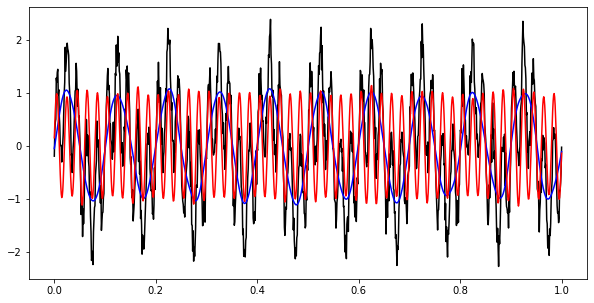

In [20]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

## 20. Проделайте подобную декомпозицию WPD для варианта № 3 вейвлета с выбором/удалением нужных узлов. Уровень декомпозиции может отличаться.

In [21]:
wp = pywt.WaveletPacket(data=F, wavelet='haar', mode='periodization')
print([node.path for node in wp.get_level(5, 'freq')])

# выводим все комбинации узлов, упорядоченные по их частотной ширине спектра

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


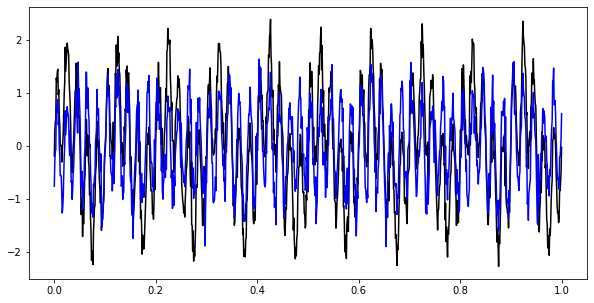

In [22]:
del wp['aaaa'] # удалим самый «глубокий» узел
reF = wp.reconstruct() # восстановим ряд
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF, 'b')
plt.show()

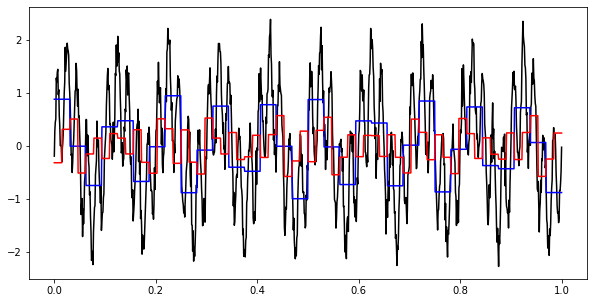

In [23]:
wp = pywt.WaveletPacket(data=F, wavelet='haar', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaad'] = wp['aaaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

## 21. Теперь примените полученные навыки вейвлет-декомпозиции всех видов, на основе базисного вейвлета для варианта № 3, для получения компонент следующих временных рядов.

## 22. Декомпозируйте сигнал с частотным изломом на 2 периодические компоненты, разделенные по времени:

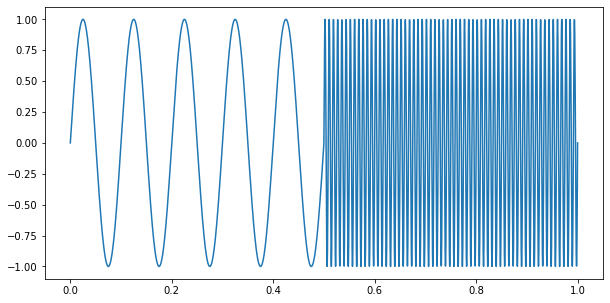

In [24]:
t = np.linspace(0, 1, 4096)
xf = np.zeros(4096)
for i in range(0, len(t)//2):
    xf[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    xf[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.show()

In [25]:
wvlt = pywt.Wavelet('haar')

print('Декомпозиция вейвлета до уровня:', end = ' ')
pywt.dwt_max_level(len(xf), wvlt)

# декомпозиция с помощью дискретных вейвлетов происходит до определенного уровня, ограниченного размером доступных данных.

Декомпозиция вейвлета до уровня: 

12

In [26]:
wp = pywt.WaveletPacket(data=xf, wavelet='haar', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')])

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


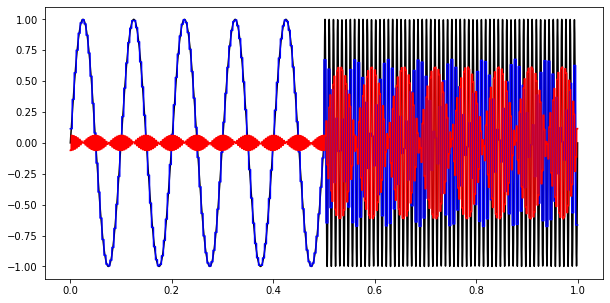

In [27]:
wp = pywt.WaveletPacket(data=xf, wavelet='haar', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, xf, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

## 23. Попробуйте выделить экспоненциальный тренд из следующего зашумленного временного ряда:

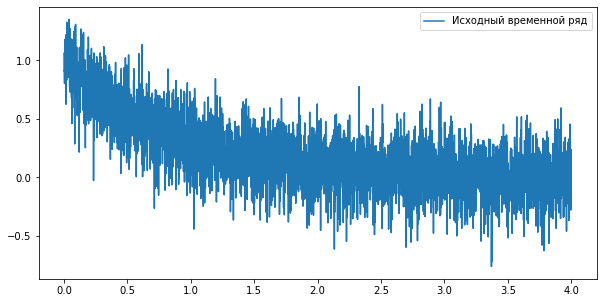

In [50]:
t = np.linspace(0, 4, 4096)
Fexp = np.exp(-0.4*np.pi*t) + 0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t,Fexp,label='Исходный временной ряд')
plt.legend()
plt.show()

In [51]:
print('Декомпозиция вейвлета до уровня:')
pywt.dwt_max_level(len(Fexp), wvlt)

Декомпозиция вейвлета до уровня:


12

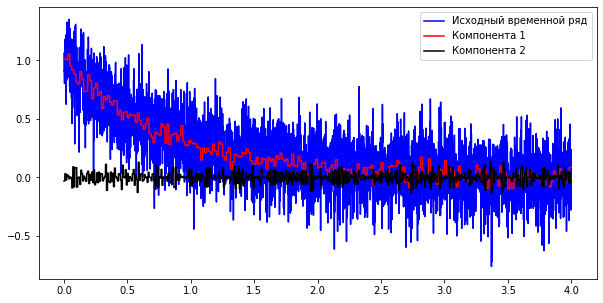

In [52]:
wp = pywt.WaveletPacket(data=Fexp, wavelet='haar', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data
new_wp.reconstruct(update=True) 
reF1 = new_wp.data 
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaad'] = wp['aaad'].data
new_wp.reconstruct(update=True) 
reF2 = new_wp.data 
plt.figure(figsize = (10, 5))
plt.plot(t, Fexp, 'b', label='Исходный временной ряд')
plt.plot(t, reF1, 'r', label='Компонента 1') # компонента 1
plt.plot(t, reF2, 'k', label='Компонента 2') # компонента 2
plt.legend()
plt.show()

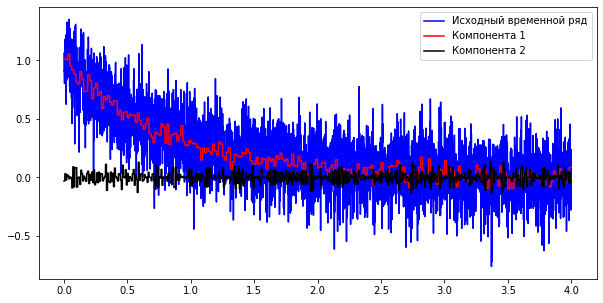

In [53]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(Fexp, wvlt, mode='periodization', level=4)

Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, Fexp, 'b', label='Исходный временной ряд')
plt.plot(t, Fre, 'r',  label='Компонента 1') # это будет первая периодика
plt.plot(t, Fre2, 'k', label='Компонента 2') # это будет вторая периодика
plt.legend()
plt.show()

### Внимание! Для выделения тренда опцию mode='periodization' внутри функций вейвлетов нужно будет убрать, так как для тренда не нужен режим периодического дополнения точек по краям.

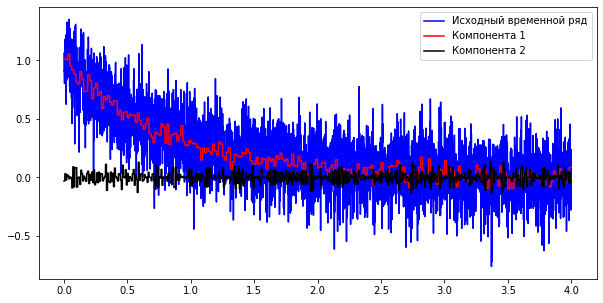

In [54]:
wp = pywt.WaveletPacket(data=Fexp, wavelet='haar')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar')
new_wp['aaaa'] = wp['aaaa'].data
new_wp.reconstruct(update=True) 
reF1 = new_wp.data 
new_wp = pywt.WaveletPacket(data=None, wavelet='haar')
new_wp['aaad'] = wp['aaad'].data
new_wp.reconstruct(update=True) 
reF2 = new_wp.data 
plt.figure(figsize = (10, 5))
plt.plot(t, Fexp, 'b', label='Исходный временной ряд')
plt.plot(t, reF1, 'r', label='Компонента 1') # компонента 1
plt.plot(t, reF2, 'k', label='Компонента 2') # компонента 2
plt.legend()
plt.show()

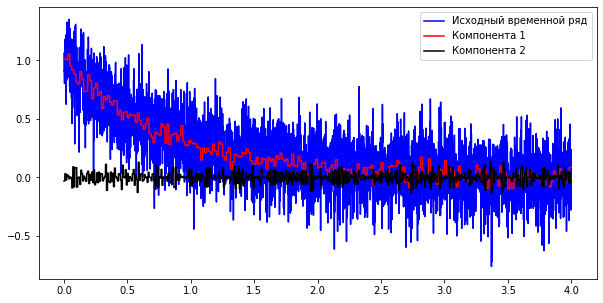

In [55]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(Fexp, wvlt, level=4)

Fre = pywt.waverec((cA4, None, None, None, None), wvlt)
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt)
plt.figure(figsize = (10, 5))
plt.plot(t, Fexp, 'b', label='Исходный временной ряд')
plt.plot(t, Fre, 'r',  label='Компонента 1') # это будет первая периодика
plt.plot(t, Fre2, 'k', label='Компонента 2') # это будет вторая периодика
plt.legend()
plt.show()

### Найдем экспоненциальный тренд по примеру Лабораторной работы № 3:

Коэффициенты B0 и B1:  [ 1.00274957 -1.23898839]
Ковариационная матрица ошибок подгонки:  [[ 0.00019404 -0.00024034]
 [-0.00024034  0.00059492]]


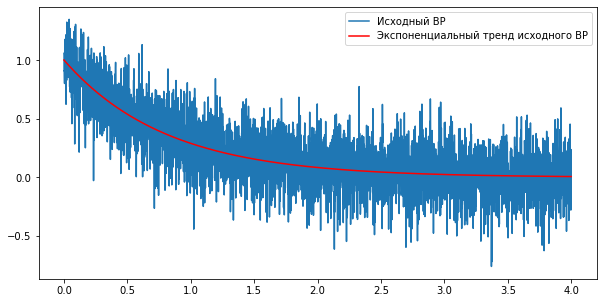

In [56]:
plt.figure(figsize=(10,5))
plt.plot(t,Fexp,label='Исходный ВР')

def func(t, b0, b1): # описываем функцию тренда
    return b0*np.exp(b1*t) 

popt_exp, pcov_exp = curve_fit(func, t, Fexp) # проводим подгонку МНК
print('Коэффициенты B0 и B1: ',popt_exp) # получаем коэффициенты b0 & b1
print('Ковариационная матрица ошибок подгонки: ',pcov_exp) # ковариационная матрица ошибок подгонки

Z = np.zeros(len(t))
for i in range(len(t)):
    Z[i] = popt_exp[0]*np.exp(popt_exp[1]*t[i])

plt.plot(t, Z,'r',label='Экспоненциальный тренд исходного ВР')
plt.legend()
plt.show()

## 24. Смоделируйте временной ряд из 4 гармоник с шумом, и разделите его на 4 гармоники с помощью вейвлет декомпозиции:

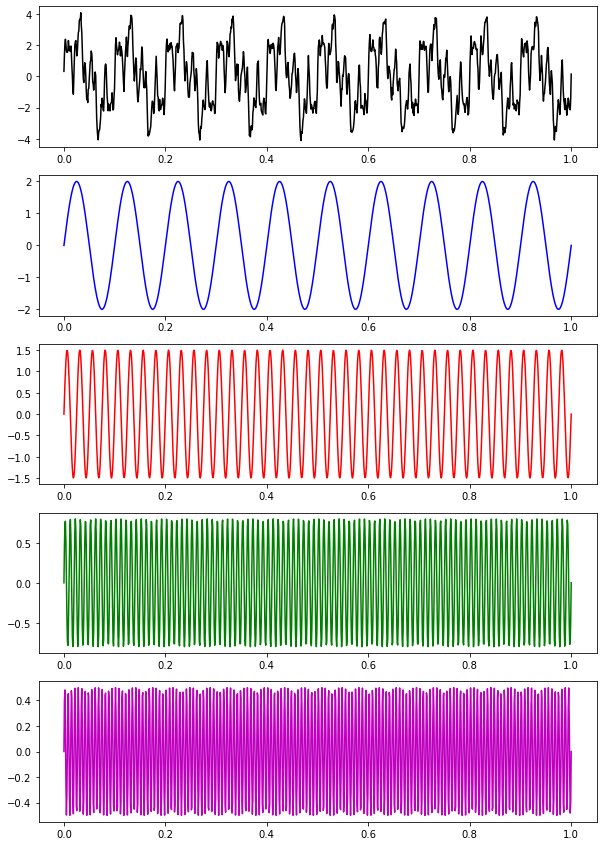

In [57]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

### Внимание! Здесь Вам потребуется выделять более двух компонент, из которых только одна будет определяться на основе коэффициента аппроксимации, а остальные – на основе коэффициентов детализации.

### Но коэффициенты детализации низких уровней имеют 2^n больше отсчетов (из-за квадратичной двоичной фильтрации), чем самый верхний уровень. Как тогда восстановить ряд? Тогда нужно просто использовать при восстановлении меньше None, чем необходимо.

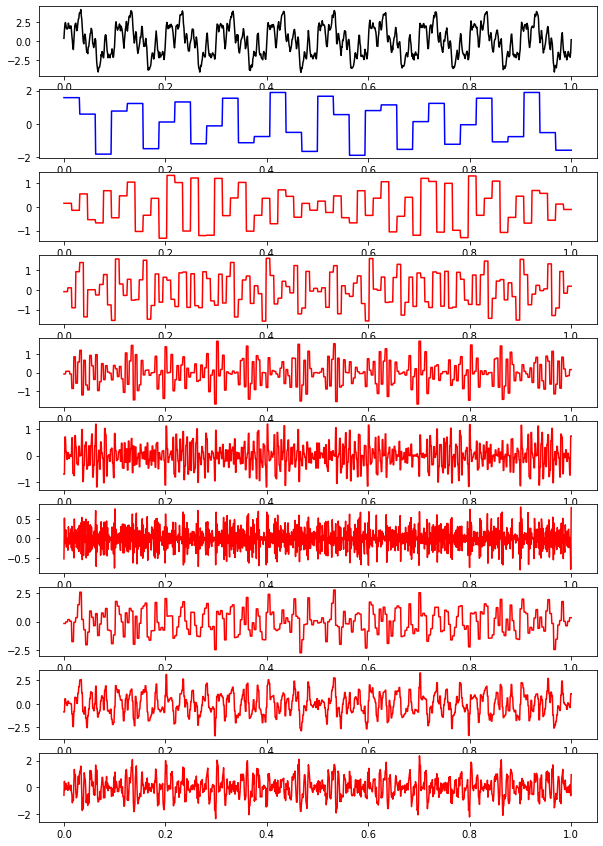

In [58]:
cA5, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=5)
Fre = pywt.waverec((cA5, None, None, None, None, None), wvlt, mode='periodization')
Fre1 = pywt.waverec((None, cD5, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')
Fre3 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')
Fre4 = pywt.waverec((None, cD2, None), wvlt, mode='periodization')
Fre5 = pywt.waverec((None, cD1), wvlt, mode='periodization')
Fre6 = pywt.waverec((None, cD4, cD3, None, None), wvlt, mode='periodization')
Fre7 = pywt.waverec((None, cD4, cD3, cD2, None), wvlt, mode='periodization')
Fre8 = pywt.waverec((None, cD3, None, cD1), wvlt, mode='periodization')

plt.figure(figsize = (10, 15))
plt.subplot(10,1,1)
plt.plot(t, F, 'k')
plt.subplot(10,1,2)
plt.plot(t, Fre, 'b')
plt.subplot(10,1,3)
plt.plot(t, Fre1, 'r') 
plt.subplot(10,1,4)
plt.plot(t, Fre2, 'r') 
plt.subplot(10,1,5)
plt.plot(t, Fre3, 'r') 
plt.subplot(10,1,6)
plt.plot(t, Fre4, 'r') 
plt.subplot(10,1,7)
plt.plot(t, Fre5, 'r') 
plt.subplot(10,1,8)
plt.plot(t, Fre6, 'r') 
plt.subplot(10,1,9)
plt.plot(t, Fre7, 'r') 
plt.subplot(10,1,10)
plt.plot(t, Fre8, 'r') 
plt.show()

## 25. Загрузите временной ряд из файла doppler.mat:

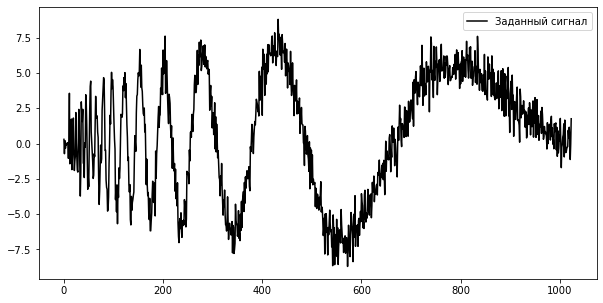

In [59]:
file = h5py.File('doppler.mat','r')
data = file.get('data')
data = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(data, 'k', label='Заданный сигнал')
plt.legend()
plt.show()

data=np.hstack(data) # делаем одномерный массив

### Декомпозируйте этот временной ряд с помощью вейвлетов таким образом, чтобы максимально очистить его от шума, но полностью сохранить его возрастающую периодику. Используйте только базисный вейвлет для варианта № 3:

In [60]:
wvlt = pywt.Wavelet('haar')
print('Декомпозиция вейвлета до уровня:', pywt.dwt_max_level(len(data), wvlt))

Декомпозиция вейвлета до уровня: 10


### Разобьем наш исходный ряд на компоненты с помощью вейвлета Мейера, в режиме периодизации, до 5 уровня декомпозиции:

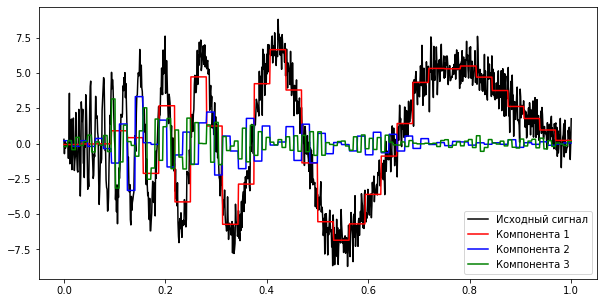

In [61]:
cA5,cD5,cD4,cD3,cD2, cD1 = pywt.wavedec(data, wvlt, mode='periodization', level=5)

Fre = pywt.waverec((cA5, None, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD5, None, None, None, None), wvlt, mode='periodization')
Fre3 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')

plt.figure(figsize = (10, 5))
plt.plot(t, data, 'k', label='Исходный сигнал')
plt.plot(t, Fre, 'r', label='Компонента 1') 
plt.plot(t, Fre2, 'b', label='Компонента 2') 
plt.plot(t, Fre3, 'g', label='Компонента 3') 
plt.legend()

plt.show()

### Вейвлет-декомпозиция (Пакетная Вейвлет Декомпозиция):

In [62]:
wp = pywt.WaveletPacket(data=data, wavelet='haar', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')])

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


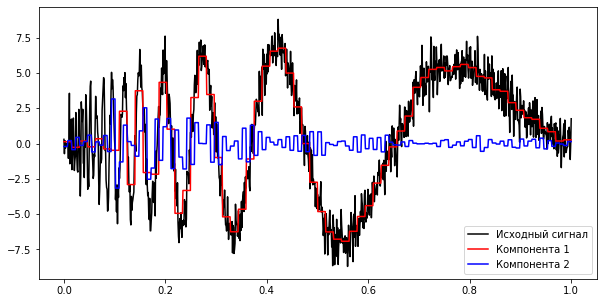

In [63]:
wp = pywt.WaveletPacket(data=data, wavelet='haar', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data
new_wp.reconstruct(update=True) 
reF1 = new_wp.data
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaad'] = wp['aaad'].data
new_wp.reconstruct(update=True) 
reF2 = new_wp.data 
plt.figure(figsize = (10, 5))
plt.plot(t, data, 'k', label='Исходный сигнал')
plt.plot(t, reF1, 'r', label='Компонента 1') 
plt.plot(t, reF2, 'b', label='Компонента 2')
plt.legend()
plt.show()

### И ещё раз отобразим график, таким образом, чтобы максимально очистить его от шума, но полностью сохранить его возрастающую периодику:

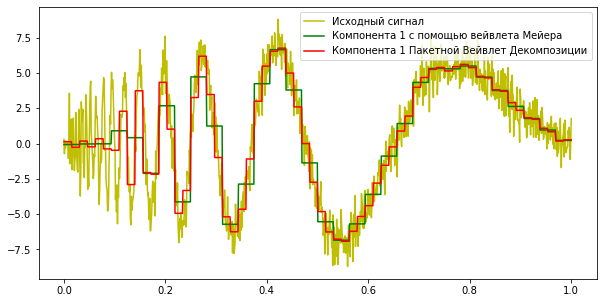

In [64]:
plt.figure(figsize = (10, 5))
plt.plot(t, data, 'y', label='Исходный сигнал')
plt.plot(t, Fre, 'g', label='Компонента 1 с помощью вейвлета Мейера') 
plt.plot(t, reF1, 'r', label='Компонента 1 Пакетной Вейвлет Декомпозиции') 
plt.legend()

plt.show()

## Выводы по работе

В ходе выполнения данной лабораторной работы были изучены средств Python для работы с вейвлетами и опробированы способы к декомпозиции временных рядов на простейшие компоненты. 

В ходе выполнения работы приобретены навыки по использованию вейвлет-инструментария для анализа и декомпозиции временных рядов, а также получения оценки их частотно-временных характеристик.  По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.